## Setup

In [103]:
import pandas as pd
import numpy as np
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [104]:
from functions import load_taxonomy
X, y = load_taxonomy(boolean=True)
display(X)
display(y)

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                      False   
                SAMD00036193                                      False   
                SAMD00036194                                      False   
                SAMD00036197                                      False   
                SAMD00036204                                      False   
...                                                                 ...   
N5              SRR5279310                                        False   
                SRR5279311                                        False   
                SRR5279312                                        False   
                SRR5279313                                        False   
V1              rhb_ram_0040                                      False   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                           False   
                SAMD00036193                                           False   
                SAMD00036194                                           False   
                SAMD00036197                                           False   
                SAMD00036204                                           False   
...                                                                      ...   
N5              SRR5279310                                             False   
                SRR5279311                                             False   
                SRR5279312                                             False   
                SRR5279313                                             False   
V1              rhb_ram_0040                                           False   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                          False   
                SAMD00036193                                          False   
                SAMD00036194                                          False   
                SAMD00036197                                          False   
                SAMD00036204                                          False   
...                                                                     ...   
N5              SRR5279310                                            False   
                SRR5279311                                            False   
                SRR5279312                                            False   
                SRR5279313                                            False   
V1              rhb_ram_0040                                          False   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                          True   
                SAMD00036193                                          True   
                SAMD00036194                                         False   
                SAMD00036197                                          True   
                SAMD00036204                                          True   
...                                                                    ...   
N5              SRR5279310                                           False   
                SRR5279311                                           False   
                SRR5279312                                           False   
                SRR5279313                                            True   
V1              rhb_ram_0040                                      

Phenotype
Study Accession Sample Accession or Sample ID           
PRJDB3601       SAMD00036192                        True
                SAMD00036193                        True
                SAMD00036194                       False
                SAMD00036197                        True
                SAMD00036204                        True
...                                                  ...
N5              SRR5279310                         False
                SRR5279311                         False
                SRR5279312                         False
                SRR5279313                         False
V1              rhb_ram_0040                       False

[5026 rows x 1 columns]

In [105]:
from functions import get_groups
groups = get_groups(X)
groups

array([ 8,  8,  8, ...,  5,  5, 41])

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut

import numpy as np

groups = get_groups(X)

strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
leave = LeaveOneGroupOut()
leave2 = LeaveOneOut()

C = 1

print("C parameter:", C)
logreg = LogisticRegression(C=C, penalty='l1',
fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=10)
scores = cross_val_score(logreg, X, np.ravel(y), cv = leave, groups=groups,
                         scoring = "balanced_accuracy", n_jobs=-1, verbose=10)
print("Raw scores:", scores)
print("Mean score:", np.mean(scores))
print("Std:", np.std(scores))
print()

C parameter: 1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  16 out of  42 | elapsed:    8.1s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  21 out of  42 | elapsed:   13.1s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  26 out of  42 | elapsed:   13.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  31 out of  42 | elapsed:   14.4s remaining:    5.1s
[Parallel(n_jobs=-1)]: Done  36 out of  42 | elapsed:   17.6s remaining:    2.9s


Raw scores: [0.6        0.39285714 0.75609756 0.65517241 0.56976744 0.4742268
 0.6953125  0.66335227 0.51153846 0.92857143 0.85843715 0.54079398
 0.52581106 0.59285714 0.61538462 0.42857143 0.60320513 0.5625
 0.58045977 1.         0.58676329 0.54348579 0.65368664 0.48429952
 0.65168539 0.53587033 0.70552381 0.34210526 0.63970588 0.45
 0.83333333 0.28571429 0.24285714 0.78787879 0.72162741 0.78504673
 0.53125    0.74242424 0.53676471 0.55367642 0.5        0.44897959]
Mean score: 0.5980379728185796
Std: 0.15737857753383142



[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   18.3s finished


In [100]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv, data_points=5, groups=None):
    t_sizes = np.linspace(0.1, 1.0, data_points)
    train_sizes, train_scores, valid_scores = learning_curve(logreg,
        X, y.values.ravel(), cv=cv, scoring="accuracy", n_jobs=-1, verbose=10, train_sizes=t_sizes, groups=groups,
        shuffle=True, random_state=42)
    training_loss = train_scores.flatten()
    valid_loss = valid_scores.flatten()
    losses = np.concatenate([training_loss, valid_loss])
    learning = pd.DataFrame(losses, columns=['accuracy'])
    n_splits = cv.get_n_splits()
    learning['set'] = ['training'] * (data_points * n_splits) + ['validation'] * (data_points * n_splits)
    learning['training set size'] = [s for s in train_sizes for i in range(n_splits)] * 2
    plt.figure(figsize=(20,10))
    plt.title("Learning Curve", fontsize=50)
    plt.xlabel("Training Set Size", fontsize=30)
    plt.ylabel("Balanced Accuracy", fontsize=30)
    sns.lineplot(data=learning, x='training set size', y='accuracy', hue="set")
    plt.savefig(config.OUTPUT_DIR + "learning_curve.png")

In [101]:
logreg = LogisticRegression(C=1, penalty='l1',
    fit_intercept=True, max_iter=1000, random_state=42, # l1_ratio=0.8,
                        solver='saga', n_jobs=-1)

[learning_curve] Training set sizes: [ 452  904 1356 1809 2261 2713 3166 3618 4070 4523]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of 100 | elapsed:    4.5s remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  13 out of 100 | elapsed:    6.7s remaining:   45.1s
[Parallel(n_jobs=-1)]: Done  24 out of 100 | elapsed:   10.3s remaining:   32.7s
[Parallel(n_jobs=-1)]: Done  35 out of 100 | elapsed:   13.9s remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  46 out of 100 | elapsed:   19.0s remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  57 out of 100 | elapsed:   23.3s remaining:   17.6s
[Parallel(n_jobs=-1)]: Done  68 out of 100 | elapsed:   25.7s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   30.1s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:   33.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.3s finished


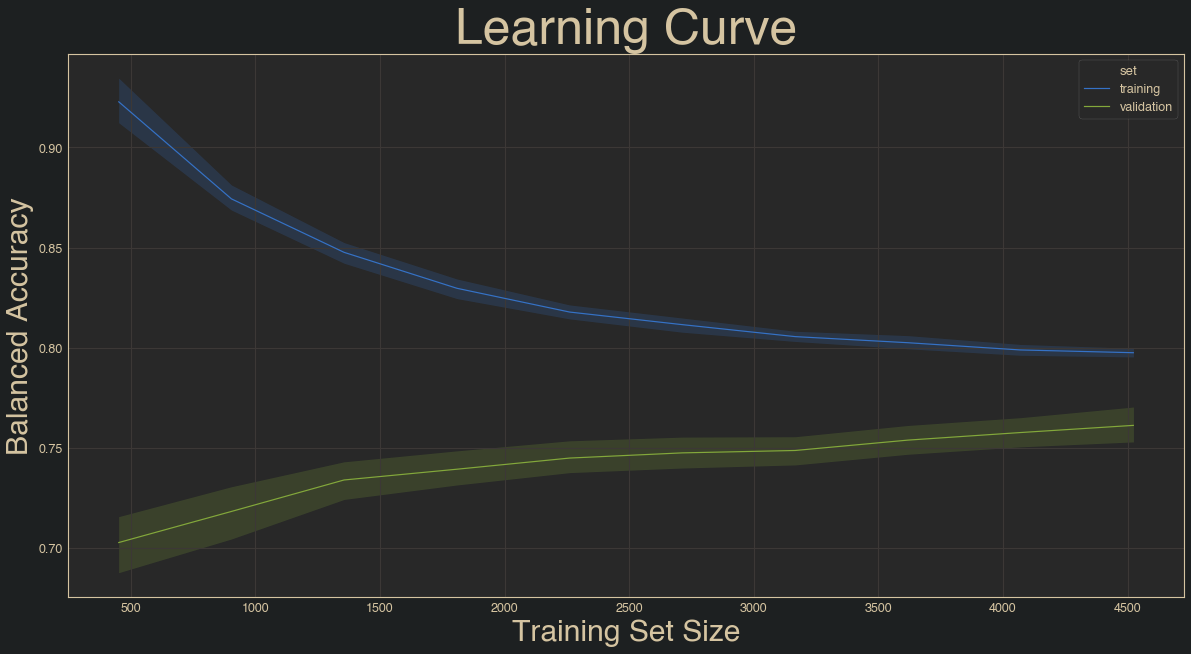

In [102]:
strat_kfold = StratifiedKFold(10, shuffle=True, random_state=42)
plot_learning_curve(logreg, X, y, strat_kfold, data_points=10, groups=groups)

,Phenotype
Study Accession,
C1,0.000000
H1,1.000000
L1,0.000000
N1,1.000000
N4,0.000000
N5,0.000000
N7,0.000000
N8,0.592593
PRJDB3601,0.838710


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_study_scores(y, scores, title):
    fig, ax = plt.subplots(figsize=(20, 15))
    groupby = y.groupby(y.index.get_level_values(0))
    counts = groupby.count()
    counts.columns = ['count']
    counts['score'] = scores
    counts['prop_healthy'] = groupby.mean()
    display(count)
    
    sorted_df = df.sort_values('sample size')
    sns.barplot(data=sorted_df, x='sample size', y='score', palette='crest')
    plt.xlabel("sample size", fontsize=30)
    plt.ylabel("Balanced Accuracy", fontsize=30)
#     plt.savefig(config.OUTPUT_DIR + title)

NameError: name 'count' is not defined

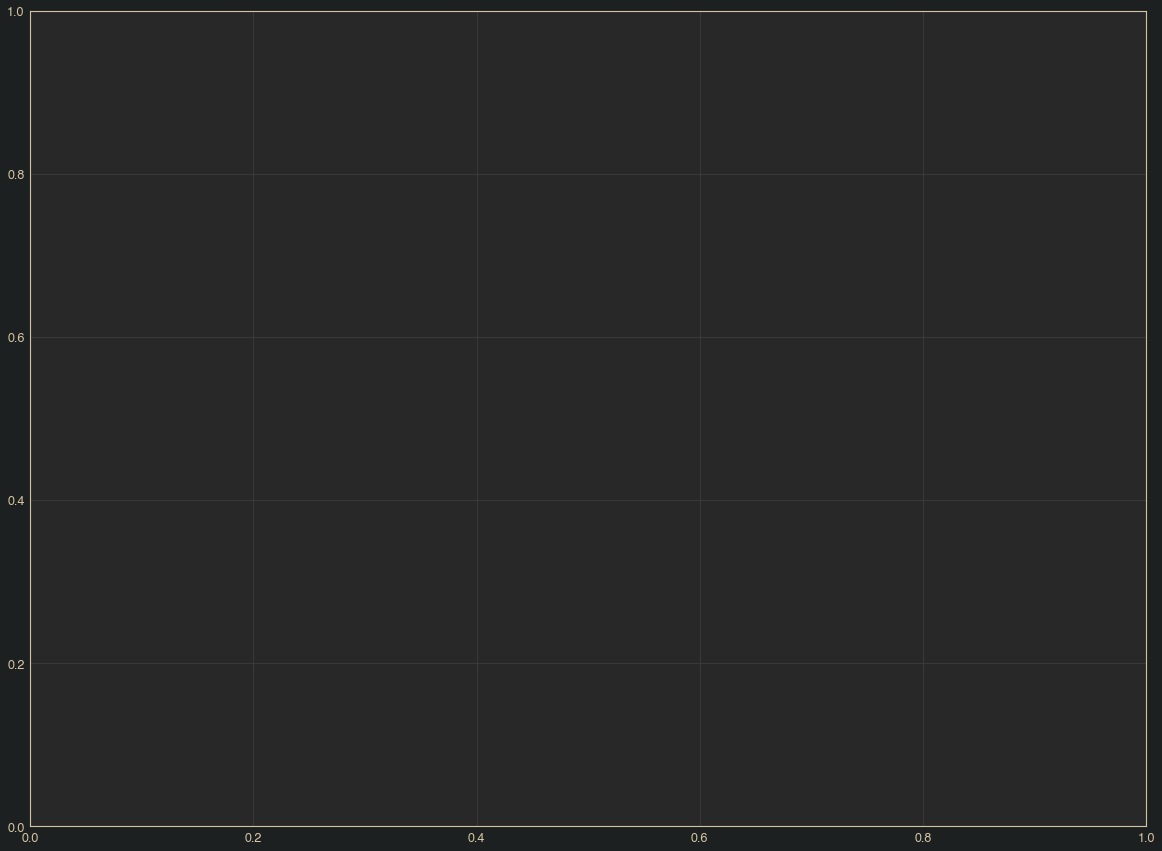

In [146]:
plot_study_scores(y, scores, "LOGOCV.png")